# Ingeniería de features, Modelos avanzados e Interpretación de modelos

## Consigna

En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

1. Detección y eliminación de Outliers
2. Encoding
3. Imputación de valores faltantes
4. Escalado de datos
5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set() 

### Exploración

Inicialmente se realiza una exploración de los datos tal y como viene la información desde el dataset, con el fin de dar a conocer todos los datos y así poder determinar que para nuestro modelo solo se utilizara la información relevante

In [5]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [6]:
data.shape

(146660, 19)

In [7]:
# Valores Faltantes
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

### Nuevo dataset 

Como se hizo en el Proyecto 1 solo se tomaran los datos relevantes para nuestro analisis, en este caso haciendo un filtro por tipo de propiedad (Casa, Departamento y PH) y por la ciudad (Capital Federal) donde estan la mayor concentración de los datos de importancia para analizar nuestro modelo.

In [9]:
nueva_data = pd.DataFrame(data)
nueva_data = nueva_data[(nueva_data.property_type.isin(['Casa','Departamento','PH']))&(nueva_data.l2=='Capital Federal')]
nueva_data.shape

(91485, 19)

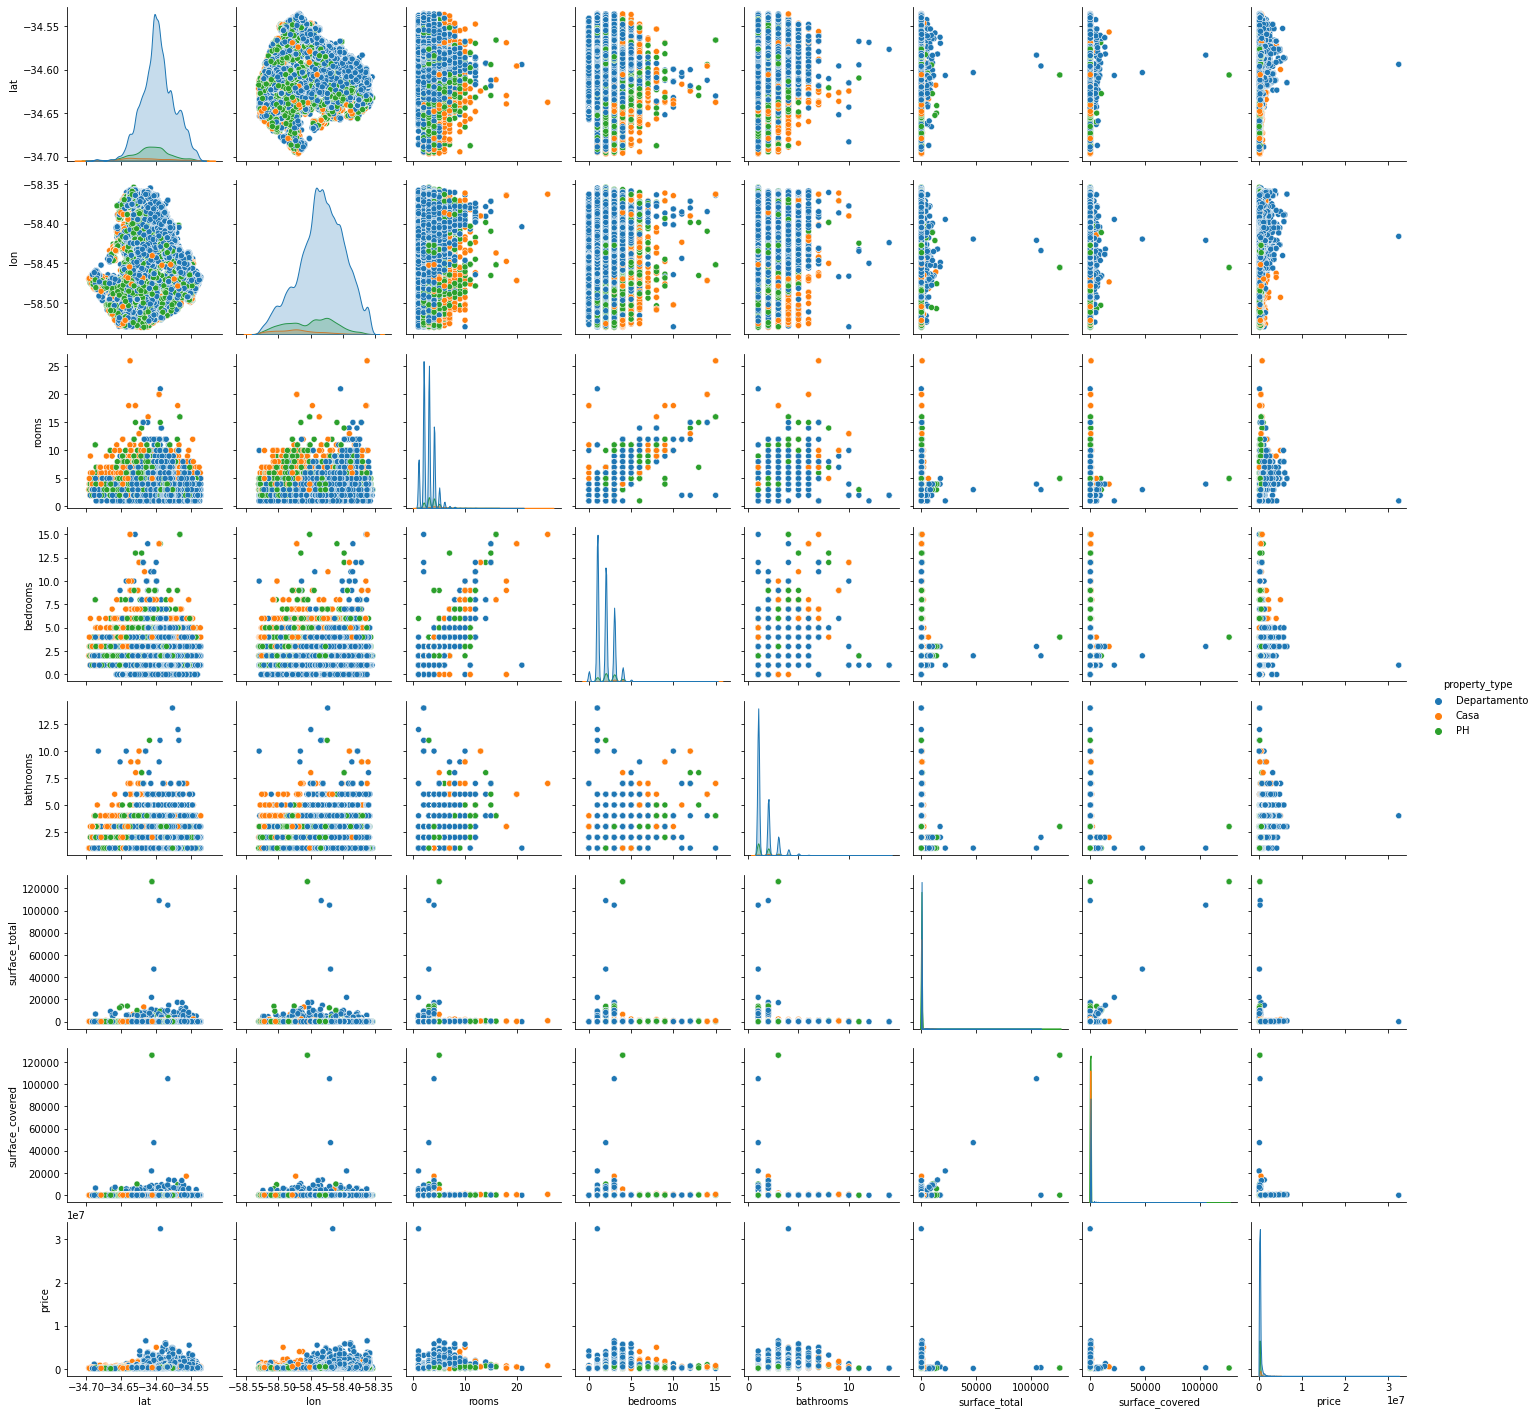

In [7]:
sns.pairplot(nueva_data, hue = 'property_type', hue_order=['Departamento', 'Casa', 'PH'])
plt.show()

### Detección y eliminación de Outliers

Se procede a identificar los valores atípicos sobre el dataset, para este caso se seleccionan las columnas más relevantes para nuestros datos que son (price, surface_total, surface_covered, bathrooms, bedrooms), una vez identificados visualmente con la herramienta boxplot se aplica la técnica del rango interquartílico donde se seleccionan los Outliers y se procede a descartalos.

### Valore Faltantes

<AxesSubplot:xlabel='price', ylabel='property_type'>

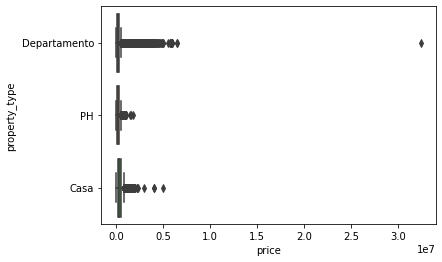

In [10]:
sns.boxplot(x="price", y="property_type", data=nueva_data)

<AxesSubplot:xlabel='surface_total', ylabel='property_type'>

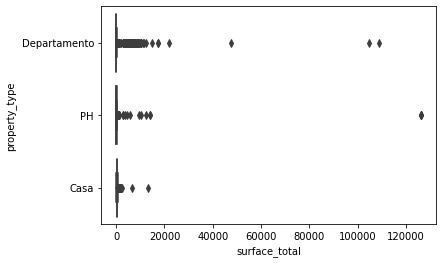

In [11]:
sns.boxplot(x="surface_total", y="property_type", data=nueva_data)

<AxesSubplot:xlabel='surface_covered', ylabel='property_type'>

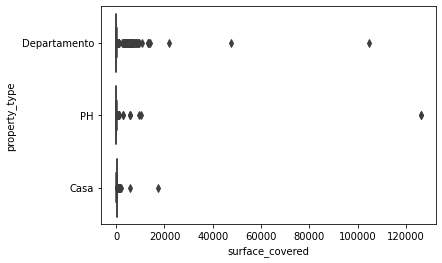

In [12]:
sns.boxplot(x="surface_covered", y="property_type", data=nueva_data)

<AxesSubplot:xlabel='bathrooms', ylabel='property_type'>

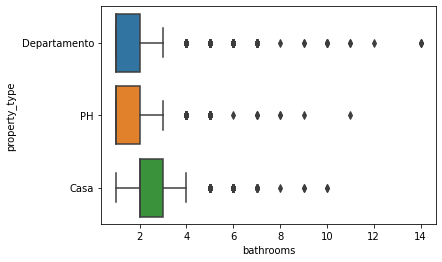

In [13]:
sns.boxplot(x="bathrooms", y="property_type", data=nueva_data)

<AxesSubplot:xlabel='bedrooms', ylabel='property_type'>

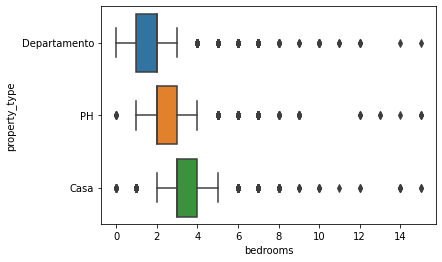

In [14]:
sns.boxplot(x="bedrooms", y="property_type", data=nueva_data)

### Manejo de outliers

#### Rango Intercuartílico

Se utiliza el rango intercuartilico para determinar eliminar los extremos ya que nuestros datos estan acotados al centro de la información presentada en el dataset, esto no va a dar unos mejores resultados a la hora de usarlos para los modelos optimizados, garantizando que no se van a generar Outliers que puedan interferir en nuestros resultados.

Para este caso se utilizan las variables price, surface_total, surface_covered, bathrooms y bedrooms que son las que tienen más correlacion para determinar el precio de la propiedad

In [15]:
nueva_data.shape

(91485, 19)

In [16]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    minimo = q1-1.5*iqr
    maximo = q3+1.5*iqr    
    df_out = df_in.loc[(df_in[col_name] > minimo) & (df_in[col_name] < maximo) | (df_in[col_name].isnull())]

    
    mascara_outliers = (df_in[col_name] < minimo) | (df_in[col_name] > maximo)
    print('Quartil 25% = ', q1)    
    print('Quartil 75% = ', q3)
    print('Iqr = ', iqr)
    print('Minimo = ', minimo)
    print('Maximo = ', maximo)
    print('Total Outliers = ', mascara_outliers.sum())
    return  df_out

In [17]:
datos_Outliers_1 = remove_outlier(nueva_data, "price")

Quartil 25% =  120000.0
Quartil 75% =  279000.0
Iqr =  159000.0
Minimo =  -118500.0
Maximo =  517500.0
Total Outliers =  7525


In [18]:
datos_Outliers_1.shape

(83960, 19)

In [19]:
datos_Outliers_2 = remove_outlier(datos_Outliers_1, "surface_total")

Quartil 25% =  48.0
Quartil 75% =  98.0
Iqr =  50.0
Minimo =  -27.0
Maximo =  173.0
Total Outliers =  4313


In [20]:
datos_Outliers_2.shape

(79620, 19)

In [21]:
datos_Outliers_3 = remove_outlier(datos_Outliers_2, "surface_covered")

Quartil 25% =  42.0
Quartil 75% =  80.0
Iqr =  38.0
Minimo =  -15.0
Maximo =  137.0
Total Outliers =  1993


In [22]:
datos_Outliers_3.shape

(77570, 19)

In [23]:
datos_Outliers_4 = remove_outlier(datos_Outliers_3, "bathrooms")

Quartil 25% =  1.0
Quartil 75% =  2.0
Iqr =  1.0
Minimo =  -0.5
Maximo =  3.5
Total Outliers =  516


In [24]:
datos_Outliers_4.shape

(77054, 19)

In [25]:
datos_Outliers_5 = remove_outlier(datos_Outliers_4, "bedrooms")

Quartil 25% =  1.0
Quartil 75% =  2.0
Iqr =  1.0
Minimo =  -0.5
Maximo =  3.5
Total Outliers =  1429


In [26]:
datos_Outliers_5.shape

(75625, 19)

<AxesSubplot:xlabel='price', ylabel='property_type'>

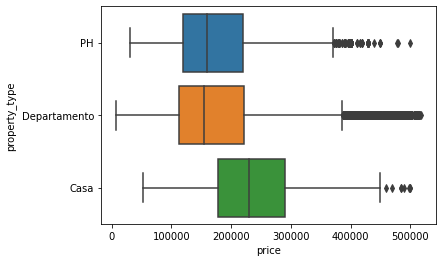

In [27]:
sns.boxplot(x="price", y="property_type", data=datos_Outliers_5)

<AxesSubplot:xlabel='surface_total', ylabel='property_type'>

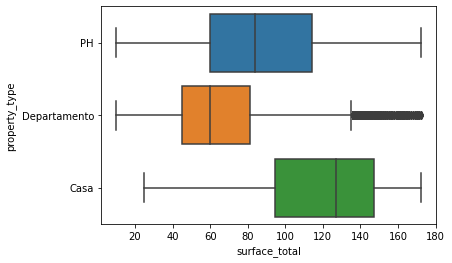

In [28]:
sns.boxplot(x="surface_total", y="property_type", data=datos_Outliers_5)

<AxesSubplot:xlabel='surface_covered', ylabel='property_type'>

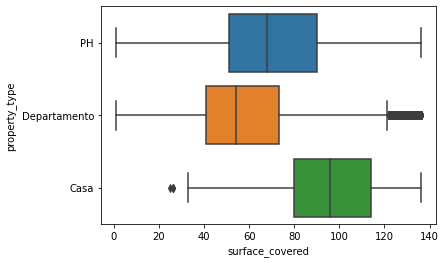

In [29]:
sns.boxplot(x="surface_covered", y="property_type", data=datos_Outliers_5)

<AxesSubplot:xlabel='bathrooms', ylabel='property_type'>

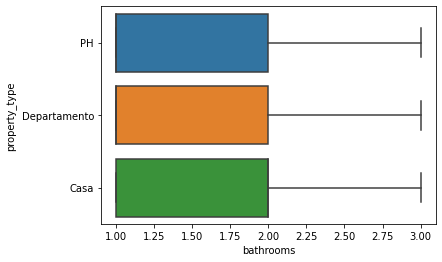

In [30]:
sns.boxplot(x="bathrooms", y="property_type", data=datos_Outliers_5)

<AxesSubplot:xlabel='bedrooms', ylabel='property_type'>

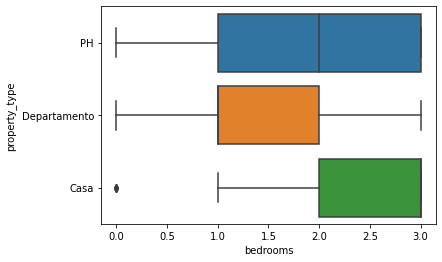

In [31]:
sns.boxplot(x="bedrooms", y="property_type", data=datos_Outliers_5)

In [32]:
datos_Outliers_5.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [33]:
datos_nuevos = datos_Outliers_5.copy()

In [34]:
datos_nuevos.isna().sum()

start_date            0
end_date              0
created_on            0
lat                3305
lon                3316
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1911
surface_total      8026
surface_covered    8302
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

### Encoding

Se procede a realizar el encoder en l3 (barrios) ya que este lo utilizare para realizar la imputación de los datos en lat y lon

In [36]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(datos_nuevos['l3'])
barrios_enc = enc.transform(datos_nuevos['l3'])

In [37]:
datos_nuevos.loc[:, 'l3'] = barrios_enc
datos_nuevos.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


### Imputación de Valores Faltantes

Una vez procesado los datos para identificar los Outliers y eliminarlos de nuestro dataset se evidencia que los feature (lat, lon, bathrooms, surface_total y surface_covered) quedaron con datos nulos, los cuales se va a proceder a imputar dichos valores nulos con el proceso de Machine Learning

### Imputación LON y LAT

Se realiza la imputación a partir de la variable barrio(l3), se procede ha realizar el Encoder ya que de esto depende una imputación acertada para cada Longitud y Latitud con dependencia del barrio ya que en el dataset se evidencia que solo manejamos la ciudad (Capital Federal)

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
data_aux = datos_nuevos.dropna()
X = np.array(data_aux['l3']).reshape(-1, 1)
y = data_aux['lon']
reg.fit(X, y)

LinearRegression()

In [39]:
datos_nuevos[datos_nuevos['lon'].isnull()].head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
35,2019-10-17,2019-12-23,2019-10-17,NaN,NaN,Argentina,Capital Federal,26,2.0,1.0,2.0,81.0,76.0,410000.0,USD,Nuevo Ingreso Palacio Bellini Alquiler,Excelente departamento de dos ambientes de 81m...,Departamento,Venta
36,2019-10-17,2019-10-27,2019-10-17,NaN,NaN,Argentina,Capital Federal,26,2.0,1.0,1.0,42.0,38.0,169000.0,USD,Precioso Departamento con cochera Zona univer...,Excelente ubicación a una cuadra y media de av...,Departamento,Venta
46,2019-10-17,2019-10-31,2019-10-17,NaN,NaN,Argentina,Capital Federal,26,2.0,1.0,1.0,52.0,46.0,159500.0,USD,Departamento de 2 ambientes en Venta en Palerm...,2 Amplios y hermosos ambientes ambientes -C...,Departamento,Venta
59,2019-10-17,2019-12-23,2019-10-17,NaN,NaN,Argentina,Capital Federal,26,2.0,1.0,1.0,42.0,38.0,169000.0,USD,Precioso Departamento con cochera Zona univer...,Excelente ubicación a una cuadra y media de av...,Departamento,Venta
86,2019-10-17,2019-10-28,2019-10-17,NaN,NaN,Argentina,Capital Federal,3,2.0,1.0,1.0,43.0,40.0,109000.0,USD,EXCELENTE DEPTO 2 AMBIENTES MUY LUMINOSO AL CO...,Excelente departamento. en torre 2 ambientes ...,Departamento,Venta


In [40]:
datos_nuevos[datos_nuevos['lon'].isnull()].l3

35        26
36        26
46        26
59        26
86         3
          ..
146525    26
146531    26
146546    26
146548    26
146550    26
Name: l3, Length: 3316, dtype: int32

In [41]:
lon_completar = reg.predict(np.array(datos_nuevos[datos_nuevos['lon'].isnull()].l3).reshape(-1, 1))

In [42]:
datos_nuevos.loc[datos_nuevos['lon'].isnull(), 'lon'] = lon_completar

In [43]:
datos_nuevos.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [44]:
datos_nuevos.isna().sum()

start_date            0
end_date              0
created_on            0
lat                3305
lon                   0
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1911
surface_total      8026
surface_covered    8302
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

### Imputación LAT

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
data_aux = datos_nuevos.dropna()
X = np.array(data_aux['l3']).reshape(-1, 1)
y = data_aux['lat']
reg.fit(X, y)

LinearRegression()

In [46]:
datos_nuevos[datos_nuevos['lat'].isnull()].head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
35,2019-10-17,2019-12-23,2019-10-17,NaN,-58.438007,Argentina,Capital Federal,26,2.0,1.0,2.0,81.0,76.0,410000.0,USD,Nuevo Ingreso Palacio Bellini Alquiler,Excelente departamento de dos ambientes de 81m...,Departamento,Venta
36,2019-10-17,2019-10-27,2019-10-17,NaN,-58.438007,Argentina,Capital Federal,26,2.0,1.0,1.0,42.0,38.0,169000.0,USD,Precioso Departamento con cochera Zona univer...,Excelente ubicación a una cuadra y media de av...,Departamento,Venta
46,2019-10-17,2019-10-31,2019-10-17,NaN,-58.438007,Argentina,Capital Federal,26,2.0,1.0,1.0,52.0,46.0,159500.0,USD,Departamento de 2 ambientes en Venta en Palerm...,2 Amplios y hermosos ambientes ambientes -C...,Departamento,Venta
59,2019-10-17,2019-12-23,2019-10-17,NaN,-58.438007,Argentina,Capital Federal,26,2.0,1.0,1.0,42.0,38.0,169000.0,USD,Precioso Departamento con cochera Zona univer...,Excelente ubicación a una cuadra y media de av...,Departamento,Venta
86,2019-10-17,2019-10-28,2019-10-17,NaN,-58.423424,Argentina,Capital Federal,3,2.0,1.0,1.0,43.0,40.0,109000.0,USD,EXCELENTE DEPTO 2 AMBIENTES MUY LUMINOSO AL CO...,Excelente departamento. en torre 2 ambientes ...,Departamento,Venta


In [47]:
datos_nuevos[datos_nuevos['lat'].isnull()].l3

35        26
36        26
46        26
59        26
86         3
          ..
146525    26
146531    26
146546    26
146548    26
146550    26
Name: l3, Length: 3305, dtype: int32

In [48]:
lat_completar = reg.predict(np.array(datos_nuevos[datos_nuevos['lat'].isnull()].l3).reshape(-1, 1))

In [49]:
datos_nuevos.loc[datos_nuevos['lat'].isnull(), 'lat'] = lat_completar

In [50]:
datos_nuevos.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [51]:
datos_nuevos.isna().sum()

start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1911
surface_total      8026
surface_covered    8302
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

### Imputación bathrooms 
Se imputa con respecto a la variable feature bedrooms ya que los baños depende de la cantidad de habitaciones

In [52]:
imputacion_bathrooms = datos_nuevos.copy()
imputacion_bathrooms.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [53]:
reg = LinearRegression()
data_aux = imputacion_bathrooms.dropna()
X = np.array(data_aux['bedrooms']).reshape(-1, 1)
y = data_aux['bathrooms']
reg.fit(X, y)

LinearRegression()

In [54]:
imputacion_bathrooms[imputacion_bathrooms['bathrooms'].isnull()].head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
351,2019-03-04,2019-07-29,2019-03-04,-34.613973,-58.391633,Argentina,Capital Federal,15,1.0,1.0,NaN,23.0,23.0,72000.0,USD,VENTA MONOAMBIENTE CONGRESO EXCELENTE ESTADO,Corredor Responsable: Damian Perrone - CUCICBA...,Departamento,Venta
360,2019-03-04,2019-03-12,2019-03-04,-34.619823,-58.437283,Argentina,Capital Federal,9,1.0,1.0,NaN,14.0,14.0,27000.0,USD,"EXCELENTE COCHERA, EXCELENTE INVERSION !",Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
438,2019-03-04,2019-07-29,2019-03-04,-34.578135,-58.461733,Argentina,Capital Federal,49,4.0,3.0,NaN,88.0,88.0,192000.0,USD,DEPTO.3 AMB Y DEP - AV. A. THOMAS 1395-V.ORTUZAR,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,Venta
573,2019-07-09,2019-07-10,2019-07-09,-34.621374,-58.442597,Argentina,Capital Federal,9,2.0,1.0,NaN,25.0,23.0,70000.0,USD,DEPARTAMENTO EN VENTA,Xintel (MSD-MSD-50) <p>Departamento 2 AMBIENTE...,Departamento,Venta
614,2019-04-25,2019-07-10,2019-04-25,-34.587077,-58.506116,Argentina,Capital Federal,50,1.0,0.0,NaN,38.0,32.0,85000.0,USD,DEPARTAMENTO EN VENTA,Xintel (CBP-CBP-79) Venta de Departamento MONO...,Departamento,Venta


In [55]:
imputacion_bathrooms[imputacion_bathrooms['bathrooms'].isnull()].bedrooms

351       1.0
360       1.0
438       3.0
573       1.0
614       0.0
         ... 
138222    1.0
138917    1.0
138950    2.0
139686    2.0
146459    1.0
Name: bedrooms, Length: 1911, dtype: float64

In [56]:
bedrooms_completar = reg.predict(np.array(imputacion_bathrooms[imputacion_bathrooms['bathrooms'].isnull()].bedrooms).reshape(-1, 1))

In [57]:
imputacion_bathrooms.loc[imputacion_bathrooms['bathrooms'].isnull(), 'bathrooms'] = bedrooms_completar

In [58]:
imputacion_bathrooms.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [59]:
imputacion_bathrooms.isna().sum()

start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total      8026
surface_covered    8302
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

### Imputación surface_total 

Se imputa con respecto a la variable feature rooms, ya que la superficie total tieneuna dependencia según la cantidad de rooms

In [60]:
imputacion_surfaceT = imputacion_bathrooms.copy()
imputacion_surfaceT.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [61]:
reg = LinearRegression()
data_aux = imputacion_surfaceT.dropna()
X = np.array(data_aux['rooms']).reshape(-1, 1)
y = data_aux['surface_total']
reg.fit(X, y)

LinearRegression()

In [62]:
imputacion_surfaceT[imputacion_surfaceT['surface_total'].isnull()].head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
2506,2019-09-21,2019-12-23,2019-09-21,-34.598304,-58.438007,Argentina,Capital Federal,26,3.0,2.0,1.0,NaN,1.0,236000.0,USD,3 Ambientes a estrenar c/ cochera y parrilla e...,Moderno departamento de 3 ambientes a estrenar...,Departamento,Venta
3172,2019-08-18,2019-10-10,2019-08-18,-34.614152,-58.465822,Argentina,Capital Federal,46,4.0,3.0,1.0,NaN,75.0,210000.0,USD,Villa Gral. Mitre*TODO LUZ*3 Dormitorios Cochera,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
4082,2019-01-31,2019-05-07,2019-01-31,-34.633890,-58.489153,Argentina,Capital Federal,18,3.0,2.0,1.0,NaN,65.0,124000.0,USD,3 AMBIENTES AL FRENTE CON BALCON,"DEPARTAMENTO PISO 3° AL FRENTE, 2 DORMITORIOS ...",Departamento,Venta
4302,2019-03-17,2019-09-06,2019-03-17,-34.639454,-58.484247,Argentina,Capital Federal,18,1.0,1.0,1.0,NaN,NaN,56000.0,USD,DEPTO. 1 AMBIENTE DIVIDIDO FLORESTA,DEPTO. DE 1 AMBIENTE DIVIDIDO EN PLANTA BAJA A...,Departamento,Venta
4446,2019-03-17,2019-09-06,2019-03-17,-34.639431,-58.482152,Argentina,Capital Federal,18,3.0,2.0,2.0,NaN,NaN,180000.0,USD,VENTA 3 AMB. SEMIPISO CON COCHERA FLORESTA,"SEMIPISO AL FRENTE DE 3 AMBIENTES CON BALCON, ...",Departamento,Venta


In [63]:
imputacion_surfaceT[imputacion_surfaceT['surface_total'].isnull()].rooms

2506      3.0
3172      4.0
4082      3.0
4302      1.0
4446      3.0
         ... 
145424    2.0
145425    1.0
145427    2.0
145588    4.0
145597    4.0
Name: rooms, Length: 8026, dtype: float64

In [64]:
rooms_completar = reg.predict(np.array(imputacion_surfaceT[imputacion_surfaceT['surface_total'].isnull()].rooms).reshape(-1, 1))

In [65]:
imputacion_surfaceT.loc[imputacion_surfaceT['surface_total'].isnull(), 'surface_total'] = rooms_completar

In [66]:
imputacion_surfaceT.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [67]:
imputacion_surfaceT.isna().sum()

start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered    8302
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

### Imputación surface_covered

Se imputa con respecto a la variable feature surfacetotal, ya que la superficie cubierta depende de la superficiente total

In [68]:
imputacion_surfaceC = imputacion_surfaceT.copy()
imputacion_surfaceC.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [69]:
reg = LinearRegression()
data_aux = imputacion_surfaceC.dropna()
X = np.array(data_aux['surface_total']).reshape(-1, 1)
y = data_aux['surface_covered']
reg.fit(X, y)

LinearRegression()

In [70]:
imputacion_surfaceC[imputacion_surfaceC['surface_covered'].isnull()].head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
722,2019-04-25,2019-06-23,2019-04-25,-34.577620,-58.465122,Argentina,Capital Federal,14,2.0,1.0,1.000000,35.000000,NaN,89000.0,USD,DEPARTAMENTO 2 AMB. IDEAL INVERSOR/PRIMERA VIV...,Departamento de 2 ambientes. EXPENSAS BAJASLiv...,Departamento,Venta
4085,2019-01-31,2019-03-16,2019-01-31,-34.611946,-58.411495,Argentina,Capital Federal,3,3.0,2.0,1.000000,70.000000,NaN,110000.0,USD,Venta Departamento en Balvanera Capital Federa...,"Departamento en Venta, Departamento luminoso, ...",Departamento,Venta
4086,2019-01-31,2019-02-06,2019-01-31,-34.611946,-58.411495,Argentina,Capital Federal,3,3.0,2.0,1.408127,70.000000,NaN,110000.0,USD,Venta Departamento en Balvanera Capital Federa...,"Departamento en Venta, Departamento luminoso, ...",Departamento,Venta
4179,2019-01-31,2019-04-02,2019-01-31,-34.599851,-58.391875,Argentina,Capital Federal,35,4.0,3.0,1.748416,105.000000,NaN,180000.0,USD,DEPARTAMENTO EN VENTA,Xintel (AUG-AUG-1632) Venta de Departamento 4 ...,Departamento,Venta
4302,2019-03-17,2019-09-06,2019-03-17,-34.639454,-58.484247,Argentina,Capital Federal,18,1.0,1.0,1.000000,30.677842,NaN,56000.0,USD,DEPTO. 1 AMBIENTE DIVIDIDO FLORESTA,DEPTO. DE 1 AMBIENTE DIVIDIDO EN PLANTA BAJA A...,Departamento,Venta


In [71]:
imputacion_surfaceC[imputacion_surfaceC['surface_covered'].isnull()].surface_total

722        35.000000
4085       70.000000
4086       70.000000
4179      105.000000
4302       30.677842
             ...    
145578    147.000000
145589    153.000000
145590     73.000000
145595     92.000000
145597    100.223688
Name: surface_total, Length: 8302, dtype: float64

In [72]:
st_completar = reg.predict(np.array(imputacion_surfaceC[imputacion_surfaceC['surface_covered'].isnull()].surface_total).reshape(-1, 1))

In [73]:
imputacion_surfaceC.loc[imputacion_surfaceC['surface_covered'].isnull(), 'surface_covered'] = st_completar

In [74]:
imputacion_surfaceC.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [75]:
imputacion_surfaceC.isna().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

### Escalado de dato

Se procede a realizar el escalado de datos de la columna Lat y Lon, con el fin de estanadirazar los datos para poder ser utilizados en los modelos optimizados

In [76]:
datos_escalado = imputacion_surfaceC.copy()
datos_escalado.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datos_escalado['lat'].values.reshape(-1, 1))
scaler.fit(datos_escalado['lon'].values.reshape(-1, 1))
# scaler.fit(data[['Datos']])

datos_escalado['lat_reesc_sk'] = scaler.transform(datos_escalado.lat.values.reshape(-1, 1))
datos_escalado['lon_reesc_sk'] = scaler.transform(datos_escalado.lon.values.reshape(-1, 1))
print(scaler.scale_, scaler.mean_)

[0.03475752] [-58.43737562]


In [76]:
scaler.fit(datos_escalado[['lat','lon']])

StandardScaler()

In [77]:
print(datos_escalado['lat'])

1        -34.624056
2        -34.593569
3        -34.581294
5        -34.593779
6        -34.600988
            ...    
146546   -34.598304
146548   -34.598304
146549   -34.576573
146550   -34.598304
146555   -34.585355
Name: lat, Length: 75625, dtype: float64


In [78]:
print(datos_escalado['lon'])

1        -58.412110
2        -58.427474
3        -58.436754
5        -58.441239
6        -58.433061
            ...    
146546   -58.438007
146548   -58.438007
146549   -58.434394
146550   -58.438007
146555   -58.427194
Name: lon, Length: 75625, dtype: float64


<AxesSubplot:xlabel='lat', ylabel='Count'>

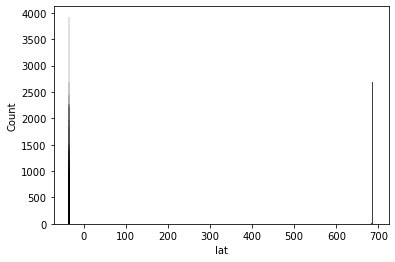

In [79]:
sns.histplot(datos_escalado.lat)
##sns.histplot(datos_nuevos['Datos_desplazados'], color='r')
sns.histplot(datos_escalado['lat_reesc_sk'], color='k')

<AxesSubplot:xlabel='lon', ylabel='Count'>

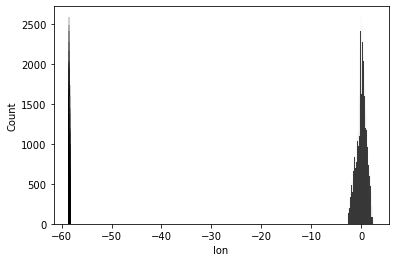

In [80]:
sns.histplot(datos_escalado.lon)
##sns.histplot(datos_nuevos['Datos_desplazados'], color='r')
sns.histplot(datos_escalado['lon_reesc_sk'], color='k')

# MODELO ARBOL DE DECISION - KNN VECINOS - REGRESION LINEA

Ejecutamos nuestro primero modelo del proyecto #1 con el dataset ya transformado y podemos evidenciar que hay una mejora sustancial con respecto a los resultados del proyecto #1 en cada uno de los modelos evidenciando  una mejora de más del 50% de la optimización de los datos.

In [82]:
datos_modelo = datos_escalado.copy()
datos_modelo.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,lat_reesc_sk,lon_reesc_sk
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,...,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,685.127074,0.726905
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,...,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,686.004196,0.284877
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,...,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,686.357354,0.017881
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,...,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,685.998152,-0.111149
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,...,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,685.790743,0.124121


In [83]:
feature_cols = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','l3','lat','lon']
X = datos_modelo[feature_cols] # Features
y = datos_modelo.price # Target variable

Se crean los atributos en el train_test_split para entrenar los modelos (Regresion Lineal, Arbol de decision y vecinos cercano)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% de test y 70%Entrenamiento
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52937, 8) (52937,) (22688, 8) (22688,)


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [86]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

La regresión lineal obtiene las pendientes y la ordenada al origen

In [87]:
print(linear_model.coef_, linear_model.intercept_)

[-3.46360092e+03 -4.20442533e+03  3.64595126e+04  9.13660722e+02
  1.39913988e+03  4.81410865e+01  9.61426319e+05  1.96944099e+05] 44772412.702274494


### Resultado

Esta es la ejecución del modelo del proyecto #1 utilizando como metrica RMSE (Raíz del error cuadrático medio para train y tes) y se evidencia que para los tres modelo comparados con el proyecto #1 hay una mejora sustancia en los resultados de los errores sin todavía entrar en la optimización de los hiperparametros con los modelos avanzados.

En este orden de ideas con la implementación del rescalado de datos, de eliminacion de outlaier y el encoding se puede ver mejora en el resultado de los datos para nuestro modelo.

Modelo: Regresión lineal
Error absoluto: 36706.49955153449
Raíz del error cuadrático medio en Train: 50517.73871582451
Raíz del error cuadrático medio en Test: 51364.50768949791


C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


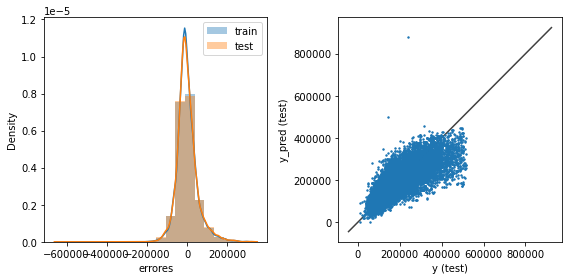

Modelo: Árbol de Decisión
Error absoluto: 39000.580832988315
Raíz del error cuadrático medio en Train: 54583.054404028524
Raíz del error cuadrático medio en Test: 55146.00827183762


C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


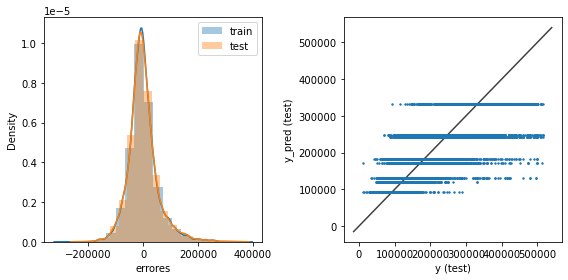

Modelo: Vecinos más cercanos
Error absoluto: 26654.89457422426
Raíz del error cuadrático medio en Train: 38056.81010857579
Raíz del error cuadrático medio en Test: 42646.55182083982


C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


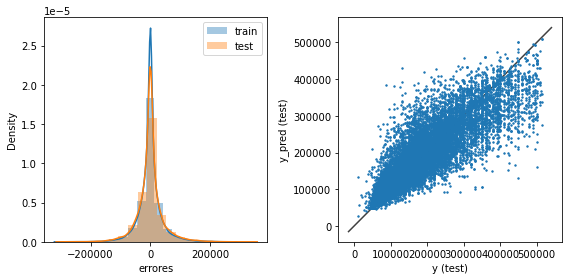

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    absolute_error = metrics.mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Error absoluto: {absolute_error}')
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# PARTE B - Modelos Avanzados

1. Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
2. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
3. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

In [92]:
datos_mavanzado = datos_modelo.copy()
datos_mavanzado.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,lat_reesc_sk,lon_reesc_sk
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,...,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,685.127074,0.726905
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,...,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,686.004196,0.284877
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,...,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,686.357354,0.017881
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,...,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,685.998152,-0.111149
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,...,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,685.790743,0.124121


In [93]:
#X = datos_modelo[['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'lat_reesc_sk', 'lon_reesc_sk']] 
X = datos_mavanzado[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'lat_reesc_sk', 'lon_reesc_sk']] 
y = datos_mavanzado['price']

# Modelo Avanzado RandomForest

El primero modelo utilizado es RandomForest con 30% en tes y 70% en train, en los estimadores se utilizo el criterio 'MSE' (mean squared error) ya que es nuestro medida de  de validaciòn para nuestros modelos utilizado desde el proyecto#1. Este modelo ya tiene todos los criterios que nos arrojo el algortimo de los mejores hiperparametros utilizando el modelo de Random Search (Se puede evidenciar en la parte inferior del modelo). 

Una vez ejecutado no es el más optimo de los modelos optimizados pero nos da una idea para verificar que evidentemente si hay una mejora sustancial con respecto al modelo del proyecto #1

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% de test y 70%Entrenamiento
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52937, 7) (52937,) (22688, 7) (22688,)


In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
clf = RandomForestRegressor(n_estimators=1000, criterion='mse', max_depth=4, max_features='sqrt', min_samples_split=2, min_samples_leaf=1, n_jobs=-1, oob_score = False, random_state = 42)
clf.fit(X_train,y_train) 

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=1000,
                      n_jobs=-1, random_state=42)

In [118]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print(f'Coeficiente de Determinacion Train: {r2_score_train}')
print(f'Coeficiente de Determinacion Test: {r2_score_test}')

Raíz del error cuadrático medio en Train: 49709.81932057218
Raíz del error cuadrático medio en Test: 50532.093542643684
Coeficiente de Determinacion Train: 0.6752481631101438
Coeficiente de Determinacion Test: 0.6654904140283036


C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


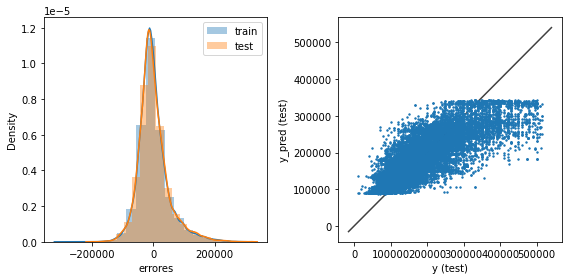

In [119]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [120]:
print(X_test.iloc[0])
print(y_test_pred[0])

rooms                4.00000
bedrooms             3.00000
bathrooms            2.00000
surface_total       94.00000
surface_covered     80.00000
lat_reesc_sk       684.80472
lon_reesc_sk         1.20546
Name: 48321, dtype: float64
227822.15980691882


In [121]:
clf.estimators_[0].predict(X_test)[0], clf.estimators_[1].predict(X_test)[0], clf.estimators_[2].predict(X_test)[0]

(158294.0558798999, 229637.35391779713, 256427.89445048966)

In [122]:
clf.feature_importances_

array([0.08165162, 0.05672527, 0.15866734, 0.31296701, 0.29206688,
       0.08446689, 0.01345498])

### Resultado

Podemos evidenciar que una vez ejecutado el modelo, la feature con mayor importancia siguen siendo las que se utilizaron en el modelo #1, surface_total, Surface_Covered y Bathrooms por lo que se va teniendo una idea que estas son las feature de mayor preponderancia para predecir el precio d euna propiedad.

C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


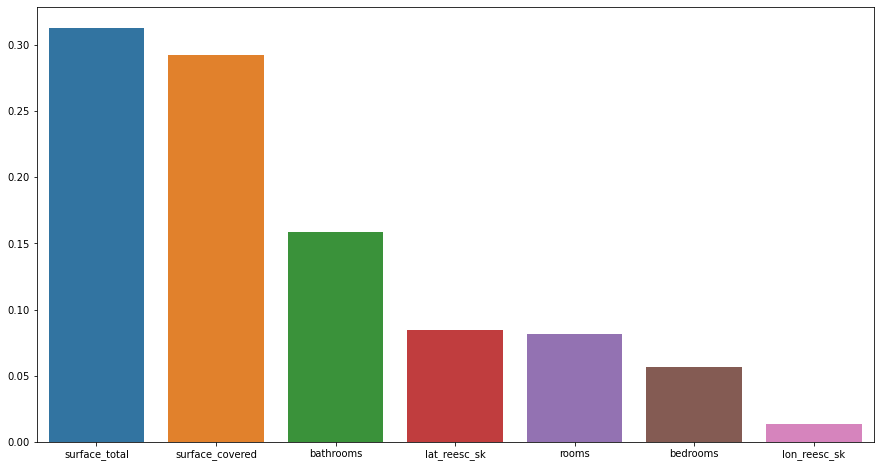

In [123]:
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

In [124]:
clf_tree = clf.estimators_[10]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 669991378,
 'splitter': 'best'}

In [125]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

57290.937704083044
57929.02227958005


In [126]:
train_mean = []
test_mean = []

N_estimadores = [10,30,70,100,250,450,700,800,1000,1200,1500]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestRegressor(n_estimators=estimadores, criterion='mse', max_depth=4, max_features='sqrt', min_samples_split=10, min_samples_leaf=4, n_jobs=-1, oob_score = False, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_mean.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_mean.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
train_mean = np.array(train_mean)
test_mean = np.array(test_mean)

10
30
70
100
250
450
700
800
1000
1200
1500


### Resultado

Se evidencia que entre los datos de entrenamiento y de testeo se comienzan a estabilizar a partir de los 600 estimadores

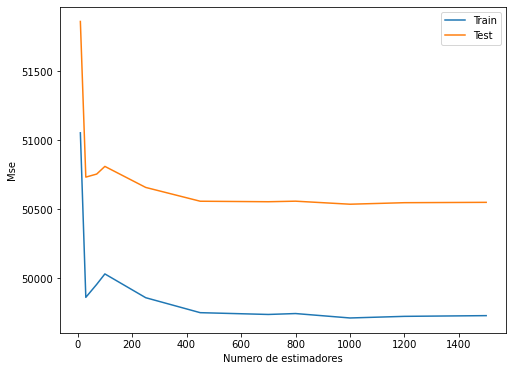

In [127]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_mean, label = 'Train')
plt.plot(N_estimadores, test_mean, label = 'Test')
plt.xlabel('Numero de estimadores')
plt.ylabel('Mse')
plt.legend()
# plt.xlim(0,50)
plt.show()

# Hiperparametro Random Search RandomForest


Se utiliza el modelo Random Search ya que como se evidencio en las bitacoras es uno de los modelos más óptimos para generar hiperparametros,se utilizan hasta un n_stimators de 1500, con una profundidad de 5.

una vez ejecutado los hiperparametos que nos generan son utlizado en el model de RandomForest para que el modelo arroje los mejores resultados

In [109]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [110]:
print(datos_modelo.keys())

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type', 'lat_reesc_sk', 'lon_reesc_sk'],
      dtype='object')


In [111]:
# Parametros RandomSearch
param_grid = {'n_estimators': [10,30,70,100,250,450,700,800,1000,1200,1500],
                'max_features': ['auto','sqrt'],
                'max_depth' : np.arange(1, 5),
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf':[1, 2, 4],
                'bootstrap': [False]}

In [112]:
Random_Rforest = RandomizedSearchCV(estimator = clf, param_distributions=param_grid, n_iter = 100, cv=5, verbose=0, random_state=100 , n_jobs = -1)
Random_Rforest.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=4,
                                                   max_features='sqrt',
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   n_estimators=1500, n_jobs=-1,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': array([1, 2, 3, 4]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 30, 70, 100, 250,
                                                         450, 700, 800

In [113]:
print("Mejores parametros: "+str(Random_Rforest.best_params_))
print("Mejor Score: "+str(Random_Rforest.best_score_)+'\n')

scores = pd.DataFrame(Random_Rforest.cv_results_)
scores

Mejores parametros: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': False}
Mejor Score: 0.6695206029499042



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.693976,0.284823,0.892671,0.215635,800,2,4,sqrt,2,False,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.569776,0.572188,0.569390,0.554118,0.550399,0.563174,0.009041,55
1,8.299810,2.019290,4.897380,1.479910,450,10,2,sqrt,3,False,"{'n_estimators': 450, 'min_samples_split': 10,...",0.634139,0.636601,0.631016,0.615710,0.616906,0.626874,0.008815,29
2,89.996461,0.423663,2.415462,0.186293,800,10,1,auto,4,False,"{'n_estimators': 800, 'min_samples_split': 10,...",0.658313,0.659359,0.660709,0.636084,0.656780,0.654249,0.009173,18
3,45.827204,8.004140,5.392942,2.105796,1200,10,4,auto,1,False,"{'n_estimators': 1200, 'min_samples_split': 10...",0.402620,0.405132,0.415417,0.379351,0.390951,0.398694,0.012415,97
4,2.918293,1.501690,3.032332,1.888668,10,5,2,sqrt,1,False,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.404406,0.397449,0.405762,0.384407,0.380370,0.394479,0.010346,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.798137,0.419138,5.138948,0.440135,70,5,1,sqrt,4,False,"{'n_estimators': 70, 'min_samples_split': 5, '...",0.673908,0.674872,0.668016,0.651387,0.659805,0.665598,0.008904,8
96,7.751942,0.320136,5.049569,0.284695,70,10,1,auto,1,False,"{'n_estimators': 70, 'min_samples_split': 10, ...",0.402620,0.405132,0.415417,0.379351,0.390951,0.398694,0.012415,95
97,81.754398,6.707751,3.842985,0.902417,1200,2,1,auto,2,False,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.521255,0.523584,0.525389,0.489741,0.508696,0.513733,0.013345,73
98,27.233037,2.599080,4.136673,1.008285,1500,5,2,sqrt,1,False,"{'n_estimators': 1500, 'min_samples_split': 5,...",0.448837,0.449044,0.450216,0.434969,0.427082,0.442030,0.009336,76


# Modelo Avanzado Bagging

In [128]:
datos_mavanzado2 = datos_modelo.copy()
datos_mavanzado2.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,lat_reesc_sk,lon_reesc_sk
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.41211,Argentina,Capital Federal,8,2.0,1.0,...,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,685.127074,0.726905


In [129]:
from sklearn.ensemble import BaggingRegressor

In [514]:
X = datos_mavanzado2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'lat_reesc_sk', 'lon_reesc_sk']] 
y = datos_mavanzado2['price']

In [515]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% de test y 70%Entrenamiento
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52937, 7) (52937,) (22688, 7) (22688,)


### Resultado

Con respecto al modelo de RandomForest el modelo de Baggin mejora sustancialmente, evidenciamos los coeficientes se ajustan más a la realidad, aunque también se puede evidenciar una leve overfiting de los datos.

In [516]:
clf = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, 
                             n_jobs=None, random_state=None, verbose=0)
clf.fit(X_train, y_train)
y_train_pred_baggin = clf.predict(X_train)
y_test_pred_baggin = clf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_baggin))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_baggin))
r2_score_train_baggin = r2_score(y_train, y_train_pred_baggin)
r2_score_test_baggin = r2_score(y_test, y_test_pred_baggin)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print(f'Coeficiente de Determinacion Train: {r2_score_train_baggin}')
print(f'Coeficiente de Determinacion Test: {r2_score_test_baggin}')


Raíz del error cuadrático medio en Train: 13572.072341452249
Raíz del error cuadrático medio en Test: 29476.854658635773
Coeficiente de Determinacion Train: 0.9757919627641908
Coeficiente de Determinacion Test: 0.886175365330933


C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


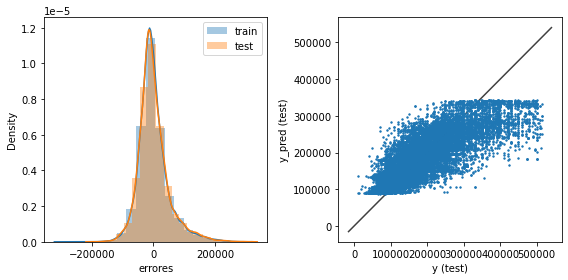

In [518]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [135]:
print(X_test.iloc[0])
print(y_test_pred[0])

rooms                4.00000
bedrooms             3.00000
bathrooms            2.00000
surface_total       94.00000
surface_covered     80.00000
lat_reesc_sk       684.80472
lon_reesc_sk         1.20546
Name: 48321, dtype: float64
227192.94274099532


In [136]:
clf.estimators_[0].predict(X_test)[0], clf.estimators_[1].predict(X_test)[0], clf.estimators_[2].predict(X_test)[0]

(158294.0558798999, 229637.35391779713, 256427.89445048966)

### Resultado

Podemos evidenciar que una vez ejecutado el modelo, la feature con mayor importancia siguen siendo las que se utilizaron en el modelo #1, surface_total, Surface_Covered y Bathrooms por lo que se va teniendo una idea que estas son las feature de mayor preponderancia para predecir el precio d euna propiedad.

C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


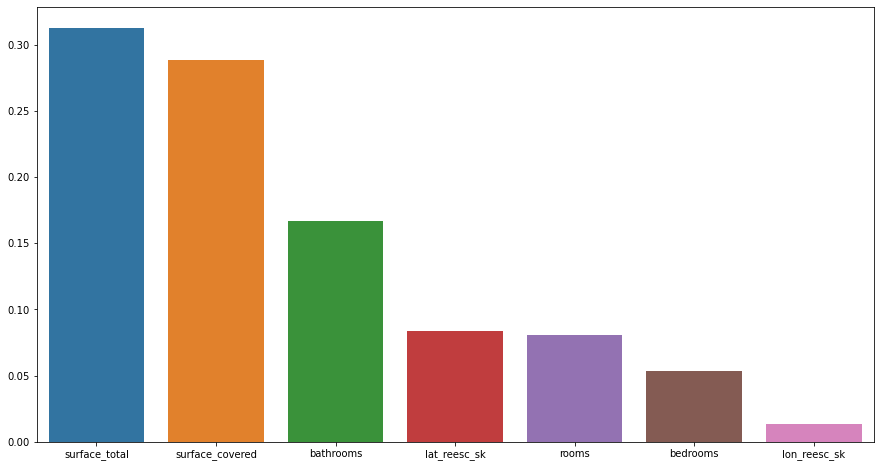

In [137]:
clf.feature_importances_

importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()


# MODELO AVANZADO Boosting

In [138]:
datos_mavanzado3 = datos_mavanzado2.copy()
datos_mavanzado3.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,lat_reesc_sk,lon_reesc_sk
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.41211,Argentina,Capital Federal,8,2.0,1.0,...,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,685.127074,0.726905


In [139]:
X = datos_mavanzado3[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'lat_reesc_sk', 'lon_reesc_sk']] 
y = datos_mavanzado3['price']

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% de test y 70%Entrenamiento
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52937, 7) (52937,) (22688, 7) (22688,)


In [179]:
from sklearn.ensemble import AdaBoostRegressor

In [180]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, 
                                learning_rate=0.2, loss='linear', random_state=None)
# Entrenamos el modelo
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.2, n_estimators=100)

### Resultado

En este modelo podemos ver que no se mejora sustancialmente los datos, se ajustan más en sus errores cuadraticos pero no se consigue un mejor score de los datos. por tanto apesar de ejecutarlo no es un modelo que sea valorado para nuestro caso.

In [143]:
y_train_pred_boosting = ada_clf.predict(X_train)
y_test_pred_boosting = ada_clf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_boosting))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_boosting))
r2_score_train_boosting = r2_score(y_train, y_train_pred_boosting)
r2_score_test_boosting = r2_score(y_test, y_test_pred_boosting)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print(f'Coeficiente de Determinacion: {r2_score_train_boosting}')
print(f'Coeficiente de Determinacion: {r2_score_test_boosting}')

Raíz del error cuadrático medio en Train: 50292.08939878367
Raíz del error cuadrático medio en Test: 51033.63629586916
Coeficiente de Determinacion: 0.6675957217649833
Coeficiente de Determinacion: 0.6588172908996761


Text(0.5, 0, 'Número de árboles')

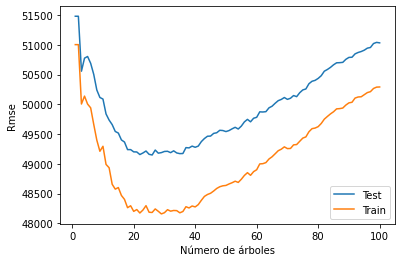

In [145]:
rmse_test = []
rmse_train = []
# Calculamos el mean squared error sobre el test set
for prediccion_test in ada_clf.staged_predict(X_test):
    rmse_test.append(np.sqrt(mean_squared_error(prediccion_test, y_test)))
    
for prediccion_train in ada_clf.staged_predict(X_train):    
    rmse_train.append(np.sqrt(mean_squared_error(prediccion_train, y_train)))
    
plt.plot(range(1, len(rmse_test) + 1), rmse_test, label = 'Test')
plt.plot(range(1, len(rmse_test) + 1), rmse_train, label = 'Train')
plt.legend()
plt.ylabel('Rmse')
plt.xlabel('Número de árboles')

In [182]:
print(X_test.iloc[0])
print(y_test_pred_boosting[0])

rooms                4.00000
bedrooms             3.00000
bathrooms            2.00000
surface_total       94.00000
surface_covered     80.00000
lat_reesc_sk       684.80472
lon_reesc_sk         1.20546
Name: 48321, dtype: float64
222442.69682907965


In [183]:
ada_clf.estimators_[0].predict(X_test)[0], ada_clf.estimators_[1].predict(X_test)[0], ada_clf.estimators_[2].predict(X_test)[0]

(180566.7877472878, 181141.82051686101, 180632.04249518923)

In [184]:
ada_clf.feature_importances_

array([0.02450786, 0.00547417, 0.15988985, 0.25358901, 0.25186709,
       0.15737448, 0.14729754])

### Resultado

Se evidencia para este modelo una importancia entre las features muy iguales entre surface_total y surface_covered, y entre bathroom, lat_reesk_sk y lon_reesk_sk desestimando las demás variables de interes de nuestro modelo como rooms y bedrooms

C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


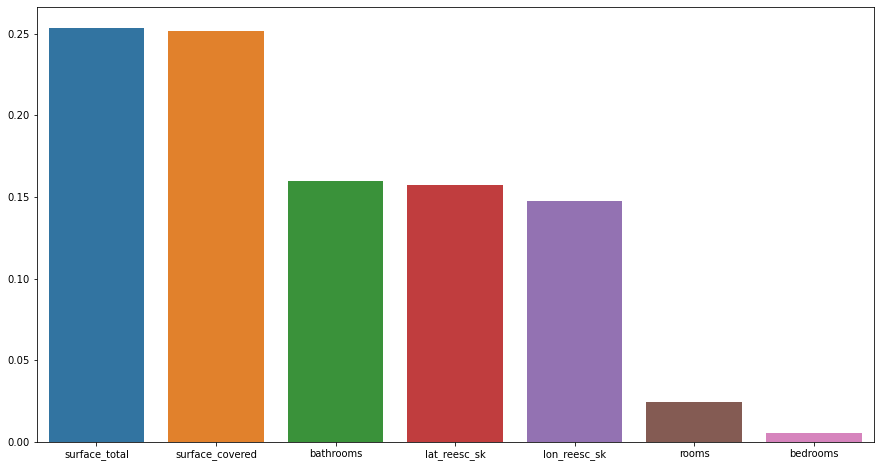

In [185]:
importances = ada_clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()


# Hiperparametros Boosting

In [433]:
# Parametros Random
param_grid = {'n_estimators': [10,30,70,100,250,450,700,800,1000,1200,1500],
              'learning_rate': [0.2, 0.3, 0.5, 0.7, 0.9]}

In [434]:
Random_boosting = RandomizedSearchCV(estimator=ada_clf, param_distributions=param_grid, cv=5, n_iter = 100, verbose=0, 
                                     random_state=100 , n_jobs = -1)
Random_boosting.fit(X, y)

C:\Users\saguirr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                               learning_rate=0.3,
                                               n_estimators=25),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.3, 0.5, 0.7,
                                                          0.9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=100)

In [435]:
print("Mejores parametros: "+str(Random_boosting.best_params_))
print("Mejor Score: "+str(Random_boosting.best_score_)+'\n')

scores = pd.DataFrame(Random_boosting.cv_results_)
scores

Mejores parametros: {'n_estimators': 100, 'learning_rate': 0.2}
Mejor Score: 0.6540749591627286



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.828467,0.799008,0.360243,0.007989,100,0.2,"{'n_estimators': 100, 'learning_rate': 0.2}",0.647949,0.657729,0.667273,0.633978,0.663446,0.654075,0.011973,1
1,37.629429,5.901919,0.596448,0.100772,200,0.2,"{'n_estimators': 200, 'learning_rate': 0.2}",0.621827,0.649556,0.616897,0.582186,0.625196,0.619133,0.021632,8
2,40.312497,8.737321,0.641883,0.156037,300,0.2,"{'n_estimators': 300, 'learning_rate': 0.2}",0.625469,0.653753,0.627773,0.573304,0.601842,0.616428,0.027115,9
3,36.044232,9.591139,0.561555,0.176397,400,0.2,"{'n_estimators': 400, 'learning_rate': 0.2}",0.649550,0.644520,0.629947,0.567245,0.645053,0.627263,0.030726,3
4,35.929261,8.745917,0.560149,0.167007,500,0.2,"{'n_estimators': 500, 'learning_rate': 0.2}",0.653902,0.635796,0.631942,0.569970,0.639033,0.626129,0.029048,5
5,23.258070,0.611669,0.376591,0.050667,100,0.3,"{'n_estimators': 100, 'learning_rate': 0.3}",0.610127,0.644161,0.635747,0.609971,0.642481,0.628497,0.015324,2
6,30.765031,7.254271,0.505679,0.130846,200,0.3,"{'n_estimators': 200, 'learning_rate': 0.3}",0.608559,0.648270,0.572129,0.558095,0.600814,0.597574,0.031328,15
7,30.223641,5.478803,0.482026,0.088477,300,0.3,"{'n_estimators': 300, 'learning_rate': 0.3}",0.564355,0.636349,0.609076,0.573210,0.641788,0.604956,0.031671,13
8,24.402854,3.916103,0.394068,0.033563,400,0.3,"{'n_estimators': 400, 'learning_rate': 0.3}",0.598062,0.637411,0.658923,0.617429,0.624013,0.627168,0.020324,4
9,27.502238,5.053121,0.408421,0.098610,500,0.3,"{'n_estimators': 500, 'learning_rate': 0.3}",0.630867,0.655598,0.592470,0.571189,0.619819,0.613988,0.029479,10


# MODELO AVANZADO XGBOOST

In [164]:
import xgboost as xgb

In [165]:
model = xgb.XGBRegressor(n_estimators=1200, max_depth=4, learning_rate=0.7, verbosity=0)
model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.7, max_delta_step=None, max_depth=4,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1200, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)

In [166]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.7, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

### Resultado

Para nuestro caso este es nusetro mejor modelo, más ajustado y donde se evidencia que tiene mejor performance en rendimiento de máquina. Por lo tanto considero que este es el modelo con el que se puede trabajar para predecir el precio de la propiedad.

In [167]:
y_train_pred_xgb = model.predict(X_train)
y_test_pred_xgb = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_score_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_score_test_xgb = r2_score(y_test, y_test_pred_xgb)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print(f'Coeficiente de Determinacion Train: {r2_score_train_xgb}')
print(f'Coeficiente de Determinacion Test: {r2_score_test_xgb}')

Raíz del error cuadrático medio en Train: 16874.542592768004
Raíz del error cuadrático medio en Test: 30474.28013608838
Coeficiente de Determinacion Train: 0.9625776319237517
Coeficiente de Determinacion Test: 0.878341937432809


In [174]:
print(X_test.iloc[0])
print(y_test_pred_xgb[0])

rooms                4.00000
bedrooms             3.00000
bathrooms            2.00000
surface_total       94.00000
surface_covered     80.00000
lat_reesc_sk       684.80472
lon_reesc_sk         1.20546
Name: 48321, dtype: float64
202725.17


In [176]:
model.feature_importances_

array([0.02310618, 0.02276653, 0.17377552, 0.45157117, 0.18933876,
       0.08871385, 0.05072796], dtype=float32)

### Resultado 

Se evidencia qeu para el modelo avanzado xgboost la feature con mayor prepondenrancia por encima de las demas es surface_total, esto nos indica que para este modelo esta variable tiene mayor intenres a la hora de predecir el precio de la propiedad.

C:\Users\saguirr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


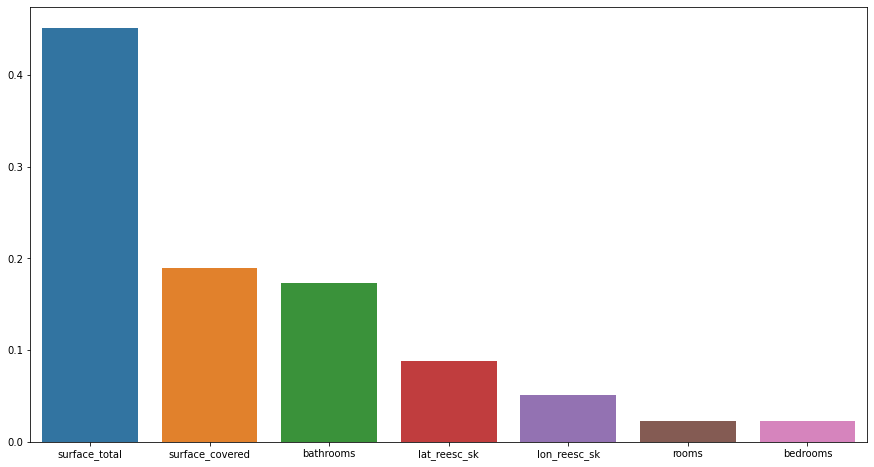

In [177]:
importances = model.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()


Text(0.5, 0, 'Número de árboles')

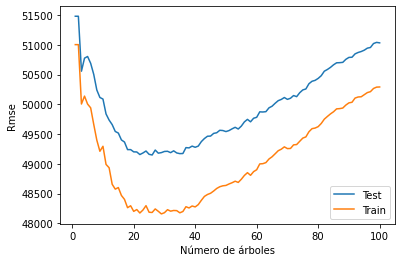

In [151]:
rmse_test = []
rmse_train = []
# Calculamos el accuracy sobre el test set
for prediccion_test in ada_clf.staged_predict(X_test):
    rmse_test.append(np.sqrt(mean_squared_error(prediccion_test, y_test)))
    
for prediccion_train in ada_clf.staged_predict(X_train):    
    rmse_train.append(np.sqrt(mean_squared_error(prediccion_train, y_train)))
    
plt.plot(range(1, len(rmse_test) + 1), rmse_test, label = 'Test')
plt.plot(range(1, len(rmse_test) + 1), rmse_train, label = 'Train')
plt.legend()
plt.ylabel('Rmse')
plt.xlabel('Número de árboles')

# Hiperparametros Xgboost

In [152]:
# Parametros Random
param_grid = {'n_estimators': [10,30,70,100,250,450,700,800,1000,1200,1500],
                'max_depth': np.arange(1, 5),
               'learning_rate': [0.2, 0.3, 0.5, 0.7, 0.9]}

In [153]:
random_xgboost = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_iter = 100, verbose=0, 
                                     random_state=100 , n_jobs = -1)
random_xgboost.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.7, max_delta_step=0,
                                          max_depth=4, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=1200, n_jobs=8,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=

In [154]:
print("Mejores parametros: "+str(random_xgboost.best_params_))
print("Mejor Score: "+str(random_xgboost.best_score_)+'\n')

scores = pd.DataFrame(random_xgboost.cv_results_)
scores

Mejores parametros: {'n_estimators': 1200, 'max_depth': 4, 'learning_rate': 0.7}
Mejor Score: 0.8679369493568956



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.195755,0.024215,0.030733,0.008585,250,2,0.3,"{'n_estimators': 250, 'max_depth': 2, 'learnin...",0.791885,0.795765,0.784051,0.764783,0.790828,0.785462,0.011007,57
1,5.018996,0.080177,0.019529,0.005531,100,4,0.5,"{'n_estimators': 100, 'max_depth': 4, 'learnin...",0.825479,0.829681,0.822682,0.801225,0.827543,0.821322,0.010311,45
2,41.083590,0.544255,0.063751,0.007788,700,4,0.5,"{'n_estimators': 700, 'max_depth': 4, 'learnin...",0.870313,0.868093,0.861034,0.840848,0.875899,0.863238,0.012166,7
3,0.362468,0.009845,0.014329,0.003748,10,3,0.9,"{'n_estimators': 10, 'max_depth': 3, 'learning...",0.744045,0.750873,0.748407,0.728167,0.747199,0.743738,0.008090,67
4,15.039417,0.161863,0.031156,0.007097,250,4,0.3,"{'n_estimators': 250, 'max_depth': 4, 'learnin...",0.845058,0.843069,0.834806,0.814138,0.840205,0.835455,0.011203,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.825287,0.786122,0.028308,0.006609,250,1,0.5,"{'n_estimators': 250, 'max_depth': 1, 'learnin...",0.713750,0.722111,0.713895,0.692778,0.712353,0.710978,0.009729,85
96,33.882404,3.000067,0.040356,0.008978,1200,1,0.9,"{'n_estimators': 1200, 'max_depth': 1, 'learni...",0.730076,0.738810,0.727701,0.709149,0.729202,0.726987,0.009726,71
97,32.288840,0.174091,0.050318,0.006423,450,4,0.3,"{'n_estimators': 450, 'max_depth': 4, 'learnin...",0.859906,0.857076,0.849460,0.827424,0.856894,0.850152,0.011879,19
98,31.864733,7.390823,0.053959,0.012320,1200,2,0.9,"{'n_estimators': 1200, 'max_depth': 2, 'learni...",0.841583,0.838753,0.826563,0.811024,0.837987,0.831182,0.011309,36


# PARTE C - Interpretación de modelos



Una vez ejecutado los modelos avanzados vemos una mejora sustancial en cuanto a los resultados con respecto al proyecto #1, e incluso se ven mejoras de un modelo avanzado con respecto a otro utilizando la misma medida RMSE, ahora bien se hubiera esperando que las variables reescalables como lon y lat tuviera mayor preponderancia en el modelo pero como vemos en cada uno de ellos, realmente la importancia de las features para predecir el precio de una propiedad siguen siendo surface_total, surface_covered y bathrooms, se esperaba que luego de realizar todo el proceso de rescalado este tuviera un peso significativo sobre las demás feature para determinar el precio de la propiedad en "capital federal" según el tipo de propiedad que para este caso fuero PH, Casa y Departamento. 

El modelo que yo utilizara para predecir el precio sería el xgboost, por varios motivos, uno de ellos tiene que ver con el rendimiento de la máquina a la hora de buscar los hiperparametros con RandomSearch este es mucho más óptimo a comparación con RandomFores y Boosting. el Otro punto a considerar es que en sus resultado de score dió mejores resultados y más asociados a la realidad de lo que puede costar una propiedad. El único pero que tengo con respecto a este modelo es el nivel de importancia de su feature, porque de alguna manera casí que se sentra unica y exclusivamente en surface_total sin darle la importancia y la ponderación a las demás feature que se utilizaron para el modelo y que de alguna manera infieren en el precio de la propiedad. 



# PROYECTO FINAL

# ANALISIS

Desde que comenzamos en el curso de Data Science hemos venido implementando varias técnicas para el modelamiento de datos y así poder tener determinación para implementar un modelo que se ajuste a nuestras necesidades. En este recorrido de conocimiento hemos implementado analisis exploratorios que nos permiten visualizar y tener un conocimiento mucho más amplio de nuestro datos, con el analisis podemos saber si nuestros datos tiene valores nulos y como los podemos imputar por medio de (LinealRegressor) sin tener que eliminarlos porque posiblemente son datos que nos serviran para nuestro modelo predictivo, así mismo como podemos detectar y eliminar los Outliers que para nuestro caso utilizamos el rango intercuartilico que nos permite eliminar los datos extremos que no hacen parte de la media de los datos y que nos pueden alterar nuestro modelo. 
Una vez terminamos el análisi exploratorio nos adentramos a realizar modelos de regresión y comparar junto a un benckmark si nuestro modelo mejora o empeora según una serie de caracteristicas, en este orden de ideas entranamos nuestro modelo con una o varias feature en la varible X estas se utilizan de acuerdo a nuestra correlación entre la feature de interes, algunos de estos modelos fuera Knn-vecino (vecinos más cercanos), arboles de decisiones y regresión lineal como modelos simples, luegos pasamos a modelos avanzados donde nos permitian utilizar más feature para entrenar el modelo pero adicional nos permitia utilizar hiperparametros para optimizar los modelos, entre los modelos mejores optimizados esta el (RandomForest, Bagging, Boosting, Baggin) unos con mejores desempeños que otros. Así mismo se utilizaron modelos para la obtención de los mejores hiperparametros y en esto se probaron dos modelos (GridSearchCV, RandomizedSearchCV) en este se llego a la conclusión para este caso en especifico que el mejor modelo para optener los hiperparametros más optimizados es el modelo de RandomizedSearchCV. 

Estos modelos fueron probados uno por uno y nos da un entendimiento de lo eficiente que pueden llegar hacer de acuerdo a nuestras necesidades, ahora bien luego nos adentramos a ver la series de tiempo que no permite tener con mayor claridad la información segun una serie de eventos de fechas que ocurre, si estos datos dentros de la serie son estacionarios o no, y que nos permite predecir datos futuros de acuerdo a los datos historicos.

Se hace un leve recuento de el proceso para llegar a implementar un modelo de predicción que se esta muy utilizado hoy en día y es todo lo que tiene que ver con Machine Learning en su concepto de redes neuronales o deep learnig, la estructura de una red basicamente es "Las redes neuronales son modelos creados al ordenar operaciones matemáticas siguiendo una determinada estructura. La forma más común de representar la estructura de una red neuronal es mediante el uso de capas (layers), formadas a su vez por neuronas (unidades, units o neurons). Cada neurona, realiza una operación sencilla y está conectada a las neuronas de la capa anterior y de la capa siguiente mediante pesos, cuya función es regular la información que se propaga de una neurona a otra" 
basicmanete podemos encontrar unas capas de entrada (input Layer), unas capas intermedias (Hidden Layer) y unas capa de salida (output layer)


# PROYECTO #4

Para realizar el último sprint, utilizo el proyecto #2 de Modelos avanzados e Interpretación de modelos, esto con el fin de  implementar un modelo de redes neuronales que me permitira afianzar conceptos y mejoras dentro del modelo de predicción .El objetivo es obtener un modelo capaz de predecir el precio de una vivienda en Argentina en la ciudad capital federal. 

Dentro del dataset pueden surgir muchas preguntas a resolver como por ejemplo

1. ¿Hay diferencia de precio de un tipo de propiedad a otra dentro de la misma ciudad?
2. Estamos validando solo capital federal ¿Si contruimos el mismo dataset pero para todas las ciudades, cual es el precio estimado en cada una de las ciudades?
3. ¿En algun periodo de tiempo, el precio de la propiedad aumenta, disminuye o sigue igual?

En fin, podemos resolver cuanto preguntas nos lleven los mismo datos a resolver inquietudes del día a día, lo que estamos buscando para este trabajo es validar si con la implementación de un modelo de redes neuronales mejora la predicción para el precio de una propiedad teniendo en cuenta las variables que venimos trabajando en el modelo, es por esta razón que seguimos resolviendo sobre el mismo Notebook para tener los datos de determinación que nos lleven a concluir nuestro objetivo final. 

Las librerias que vamos a utilizar para este caso de las redes neuronales son Keras

"Keras es una biblioteca de código abierto de Python potente y fácil de usar para desarrollar y evaluar modelos de aprendizaje profundo. Envuelve las eficientes bibliotecas de cálculo numérico Theano y TensorFlow y permite definir y entrenar modelos de redes neuronales en tan solo unas líneas de código"

Fuente: https://www.tensorflow.org/api_docs/python/tf/keras/models?hl=es-419


- from keras.models import Sequential
- from keras.layers import Dense,Activation,Flatten
- from sklearn.preprocessing import MinMaxScale

Adicional a esto me he basado en las bitacoras 46 y 47 de las clases recibidas por acamica así como de la siguiente bibliografia:
https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/
https://medium.com/datos-y-ciencia/proyecto-machine-learning-predicci%C3%B3n-de-precios-de-viviendas-en-boston-con-regresi%C3%B3n-e8655e6c3655

## Librerias

In [78]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import pathlib

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

print(tf.__version__)

2.6.0


### ANALISIS EXPLORATORIO

Para este modelo se va a utilizar el dataset de Properati, ahora bien los datos en el proyecto #2 ya surgieron una transformación, donde se realizo el manejo de outliers con rango intercuartilico para determinar eliminar los extremos ya que nuestros datos estan acotados al centro de la información presentada en el dataset y se imputaron los valores faltantes con un modelo de LinearRegression.

In [79]:
dataset_final = imputacion_surfaceC.copy()
dataset_final.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,8,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,26,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,26,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,44,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,44,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [80]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75625 entries, 1 to 146555
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       75625 non-null  object 
 1   end_date         75625 non-null  object 
 2   created_on       75625 non-null  object 
 3   lat              75625 non-null  float64
 4   lon              75625 non-null  float64
 5   l1               75625 non-null  object 
 6   l2               75625 non-null  object 
 7   l3               75625 non-null  int32  
 8   rooms            75625 non-null  float64
 9   bedrooms         75625 non-null  float64
 10  bathrooms        75625 non-null  float64
 11  surface_total    75625 non-null  float64
 12  surface_covered  75625 non-null  float64
 13  price            75625 non-null  float64
 14  currency         75625 non-null  object 
 15  title            75625 non-null  object 
 16  description      75625 non-null  object 
 17  property_ty

In [81]:
# Número de datos ausentes por variable
# ==============================================================================
dataset_final.isna().sum().sort_values()

start_date         0
description        0
title              0
currency           0
price              0
surface_covered    0
surface_total      0
bathrooms          0
property_type      0
bedrooms           0
l3                 0
l2                 0
l1                 0
lon                0
lat                0
created_on         0
end_date           0
rooms              0
operation_type     0
dtype: int64

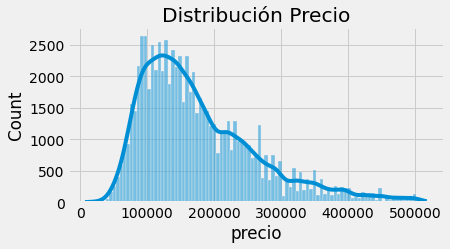

In [82]:
# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=dataset_final, x='price', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

### Análisis

Los modelos de redes neuronales son de tipo no paramétrico, no asumen ningún tipo de distribución de la variable respuesta, por lo tanto, no es necesario que esta siga ninguna distribución concreta (normal, gamma...). Aun así, hacemos un estudio mínimo, ya que, a fin de cuentas, es lo que interesa predecir. En este caso, la variable precio tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media.

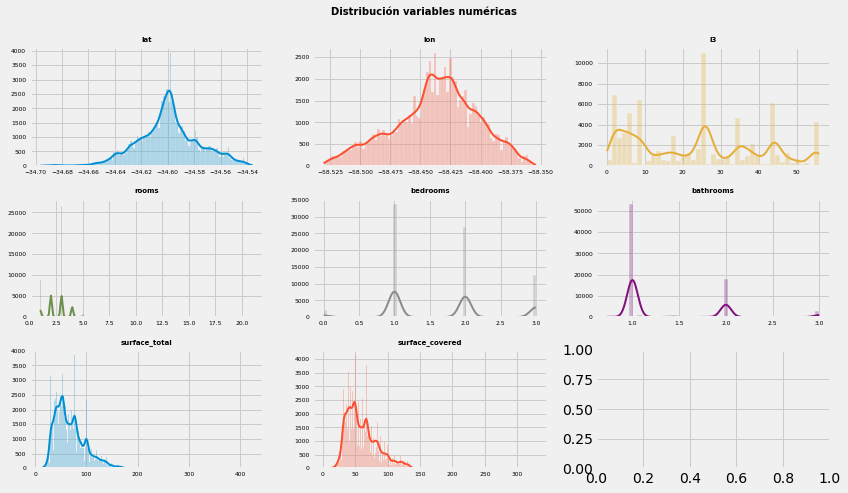

In [83]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = dataset_final.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dataset_final,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [96]:
datos_red = dataset_final[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','l3','lat','lon', 'price']]
datos_red.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l3,lat,lon,price
1,2.0,1.0,2.0,70.0,58.0,8,-34.624056,-58.412110,159000.0
2,2.0,1.0,1.0,45.0,45.0,26,-34.593569,-58.427474,125000.0
3,2.0,1.0,1.0,85.0,50.0,26,-34.581294,-58.436754,295000.0
5,2.0,1.0,1.0,56.0,56.0,44,-34.593779,-58.441239,150000.0
6,2.0,1.0,1.0,70.0,70.0,44,-34.600988,-58.433061,159500.0


In [97]:
datos_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75625 entries, 1 to 146555
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            75625 non-null  float64
 1   bedrooms         75625 non-null  float64
 2   bathrooms        75625 non-null  float64
 3   surface_total    75625 non-null  float64
 4   surface_covered  75625 non-null  float64
 5   l3               75625 non-null  int32  
 6   lat              75625 non-null  float64
 7   lon              75625 non-null  float64
 8   price            75625 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 7.5 MB


### Dividamos la data en entrenamiento y prueba

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. para este caso se utiliza el 70% de entrenamiento y 30% de test.

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

In [98]:
train_dataset = datos_red.sample(frac=0.7,random_state=0)
test_dataset = datos_red.drop(train_dataset.index)

In [99]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
rooms,52938.0,2.594450,0.938342,1.000000,2.000000,3.000000,3.000000,18.000000
bedrooms,52938.0,1.658978,0.784849,0.000000,1.000000,2.000000,2.000000,3.000000
bathrooms,52938.0,1.312473,0.537181,0.727548,1.000000,1.000000,2.000000,3.000000
surface_total,52938.0,67.621784,28.785176,10.000000,46.000000,61.000000,83.000000,424.770968
surface_covered,52938.0,59.921219,23.721201,1.000000,42.000000,55.000000,74.000000,328.981617
l3,52938.0,23.530186,16.435741,0.000000,8.000000,26.000000,36.000000,56.000000
lat,52938.0,-34.599443,0.023089,-34.696419,-34.613087,-34.599641,-34.586612,-34.535818
lon,52938.0,-58.437377,0.034755,-58.530467,-58.459148,-58.434834,-58.413632,-58.353930


Separo el valor objetivo, o la "etiqueta" de las caracteristicas. Esta etiqueta es el valor que entrenara el modelo para predecir.

In [100]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

### Normalización de la data

Es una buena práctica normalizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo "podría" converger sin normalización de características, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

Estos datos normalizados es lo que usaremos para entrenar el modelo.

In [101]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### Construcción del Modelo

Aquí, utilizare un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [102]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [104]:
model = build_model()

### Inspeccione el modelo

Uso el método .summary para imprimir una descripción simple del modelo

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


Ahora pruebe el modelo. Tome un lote de ejemplos 10 de los datos de entrenamiento y llame amodel.predict en él.

In [106]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.16973649],
       [-0.2503571 ],
       [-0.5473082 ],
       [ 0.31095406],
       [-0.01308414],
       [-0.36161092],
       [-0.31485322],
       [-0.37491095],
       [-0.12407972],
       [-0.36509997]], dtype=float32)

### Entrenar a la modelo

Entreno el modelo durante 1000 épocas y registro la precisión de entrenamiento y validación en el objeto history.

In [158]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto history.

In [159]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.457183e+09,26901.431641,1.457183e+09,1.528145e+09,27372.681641,1.528145e+09,995
996,1.457236e+09,26913.851562,1.457236e+09,1.521825e+09,27350.996094,1.521825e+09,996
997,1.456809e+09,26897.164062,1.456809e+09,1.518103e+09,27345.474609,1.518103e+09,997
998,1.457365e+09,26912.533203,1.457365e+09,1.522654e+09,27292.416016,1.522654e+09,998
999,1.457620e+09,26896.607422,1.457620e+09,1.529440e+09,27321.009766,1.529440e+09,999


In [160]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


### Análisis

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 100 épocas. Se actualiza la llamada model.fit para detener automáticamente el entrenamiento cuando el puntaje de validación no mejore. Utilizare una Edevolución de llamada de EarlyStoppingE que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.

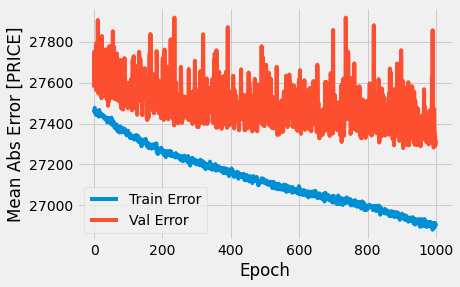

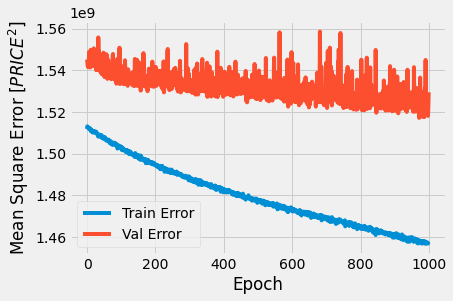

In [161]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [PRICE]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$PRICE^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............

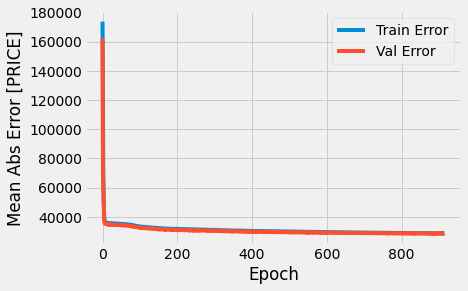

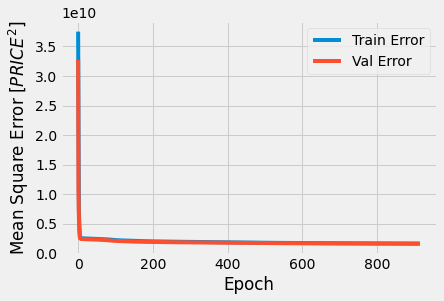

In [162]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

Veamos qué tan bien generaliza el modelo al usar el conjunto "test", que no usamos al entrenar el modelo. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real.

In [163]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Price".format(mae))

709/709 - 1s - loss: 1705180288.0000 - mae: 29211.1660 - mse: 1705180288.0000
Testing set Mean Abs Error: 29211.17 Price


### Predicciones

Finalmente, predigo los valores de Price utilizando datos en el conjunto de pruebas:

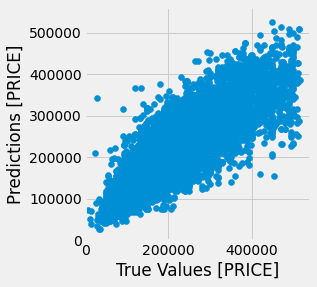

In [164]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [PRICE]')
plt.ylabel('Predictions [PRICE]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Parece que el modelo predice razonablemente bien.

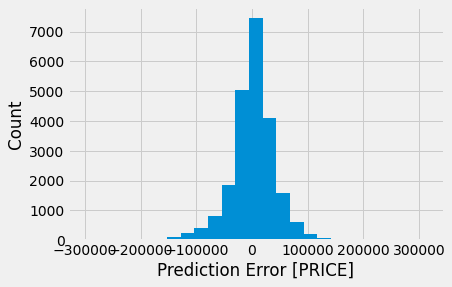

In [165]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [PRICE]")
_ = plt.ylabel("Count")

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

1. El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión.
2. Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
3. Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
5. Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.

Se puede determinar que un modelo de redes neuronales es un ocpión muy optima para predecir en este caso datos continuos, dependera del número de capas que le queramos agregar y de la cantidad de feature que tengamos en nuestro dataset. Es de vital importacia hacer inicialmente un buen analisis exploratorio de nuestro datos para poder determinar que feature necesitan un tratamiento especial ya sea un encoder, un rescalado de datos o en su defecto una imputación. 

Para nuestro modelo de predicción de precios el modelo se ajusta muy bien a lo que habíamos conseguido en el sprint #2 que como conclusión se había conseguido que el modelo avanzado más óptimo para predecir era el Xgboost y una vez pasado los datos por una red neuronal lo vemos mucho más efeciente y solido a la hora de hacer la predicción de los precios de las propiedades. 

Se ha realizo un buen trabajo desde todo punto de vista, pasando por modelo simples, avanzados, series de tiempo y redes neuronales, todos con el unico objetivo de predecir un evento o dar respuesta a una pregunta que surge, asi mismo se pueden dar respuesta a las preguntas que surgan de nuestro dataset o apoyandonos en datos nuevos que puedan ser agregados y complemento para llegar a una respuesta apartir de los datos.

